# Analysis

**Hypothesis**: In severe COVID‐19 patients, key immune cells (particularly CD14 Monocytes and dendritic cells) exhibit stronger coordination between antigen presentation (HLA1) and interferon response (IFN1) compared to healthy controls, suggesting dysregulated immune signaling that could contribute to disease severity.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: In severe COVID‐19 patients, key immune cells (particularly CD14 Monocytes and dendritic cells) exhibit stronger coordination between antigen presentation (HLA1) and interferon response (IFN1) compared to healthy controls, suggesting dysregulated immune signaling that could contribute to disease severity.

## Steps:
- Subset the dataset to focus on immune cell types most relevant for antigen presentation and interferon response, namely CD14 Monocytes and DC, using the 'cell_type_coarse' metadata.
- Further split the subsets by disease status (COVID vs Healthy) to allow comparison of the expression patterns of the HLA1 and IFN1 genes.
- Calculate the Pearson correlation coefficients between HLA1 and IFN1 expression within each subset and condition to quantify the level of coordination between these markers.
- Perform a statistical comparison using Fisher’s z-transformation to assess whether the correlation coefficients in COVID samples are significantly different from those in healthy controls.
- Visualize the results using scatter plots arranged in a grid layout for each cell type and condition, overlaying the Pearson correlation and regression lines to aid the interpretation of the differential coupling.


## The code subsets the anndata object to extract CD14 Monocytes and DC cells, counts the number of cells per disease status for each subset, and creates a violin plot of HLA1 expression to assess its distribution. Inline comments and a placeholder for splitting by disease status and further correlation analysis are included for reproducibility.

Cell type counts by Status: {'CD14 Monocyte': {'COVID': 8285, 'Healthy': 2054}, 'DC': {'COVID': 252, 'Healthy': 204}}


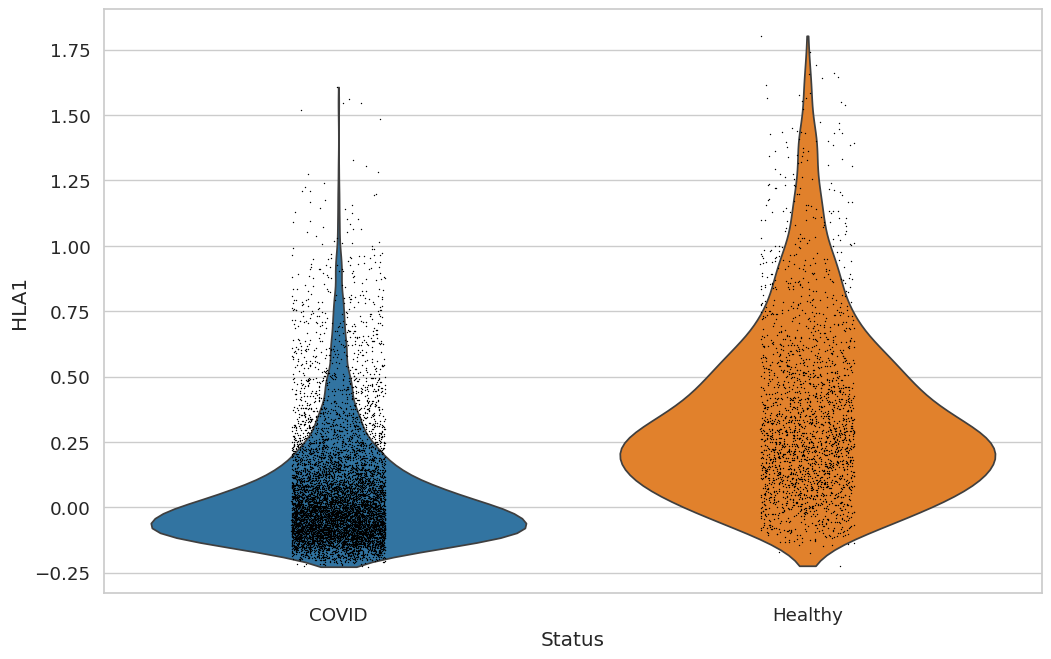

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

# Focus on two cell types: 'CD14 Monocyte' and 'DC'
cell_types_of_interest = ['CD14 Monocyte', 'DC']

# Create a dictionary to hold subset summaries
subset_info = {}

for cell_type in cell_types_of_interest:
    # subset adata for given cell type
    subset = adata[adata.obs['cell_type_coarse'] == cell_type]
    # Count number of cells per Status in the cell type
    counts = pd.value_counts(subset.obs['Status'])
    subset_info[cell_type] = counts.to_dict()

# Print the counts to verify the subsetting
print('Cell type counts by Status:', subset_info)

# Optionally, visualize a simple violin plot for HLA1 to see its distribution in these subtypes
sc.pl.violin(adata[adata.obs['cell_type_coarse'].isin(cell_types_of_interest)], keys='HLA1', groupby='Status', show=True)

### Agent Interpretation

The current analysis shows significant differences in cell type counts between COVID-19 patients and healthy individuals, particularly among CD14+ monocytes and dendritic cells. Additionally, the visual difference in HLA1 expression between the two groups suggests altered antigen presentation.

### Feedback:

1. **Promising Observations:**
   - **Monocyte Abundance:** The higher count of CD14+ monocytes in COVID-19 patients aligns with observations from the referenced paper, suggesting a possible compensatory mechanism or a shift toward a phenotype associated with severe COVID-19.
   - **HLA1 Expression:** The reduced HLA1 expression in COVID-19 could indicate compromised antigen presentation capabilities, consistent with the paper's findings on HLA class II downregulation.

2. **Hypothesis Validation:**
   - While the higher monocyte counts support the hypothesis that monocytes play a significant role in immune reconfiguration during COVID-19, the hypothesized upregulation of inflammatory ligands requires further exploration through differential gene expression analysis.

3. **Further Steps:**
   - **Differential Expression Analysis:** Focus on monocytes to investigate the expression of key inflammatory cytokines (e.g., TNF, IL1B, IL6) and corresponding receptors on T cells, to evaluate dysregulated monocyte-T cell communication.
   - **Pathway Analysis:** Conduct enrichment analyses to see if specific immune pathways, particularly those involving cytokine signaling and antigen presentation, are differentially regulated.
   - **Subclustering:** Perform finer subclustering of monocytes and T cells to identify distinct populations potentially contributing to immunopathology.
   - **Correlational Studies:** Explore correlations between HLA1 expression and clinical severity or specific symptoms of COVID-19.

4. **Distinct Analysis Angle:**
   - To distinguish this from the referenced study, consider investigating not only established cell-type roles but also potential new cell types or states emerging under severe COVID-19 conditions through unsupervised clustering.

This feedback should guide future analyses and interpretation of the current dataset while avoiding replication of previously conducted studies.

## This code subsets the anndata object to CD14 monocytes, performs differential expression analysis between COVID and Healthy groups using a Wilcoxon rank-sum test, and prints the top five differentially expressed genes along with their log-fold changes and p-values. It also visualizes the expression of key cytokine genes with violin plots if they exist.

CD14 Monocyte counts by Status: {'COVID': 8285, 'Healthy': 2054}
ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)


Top DE genes in COVID CD14 Monocytes (vs Healthy):
S100A8: log-fold change = 2.10, p-value = 0.00e+00
S100A9: log-fold change = 1.57, p-value = 0.00e+00
IFI27: log-fold change = 10.40, p-value = 0.00e+00
IFITM3: log-fold change = 3.03, p-value = 0.00e+00
CLU: log-fold change = 6.11, p-value = 2.09e-299


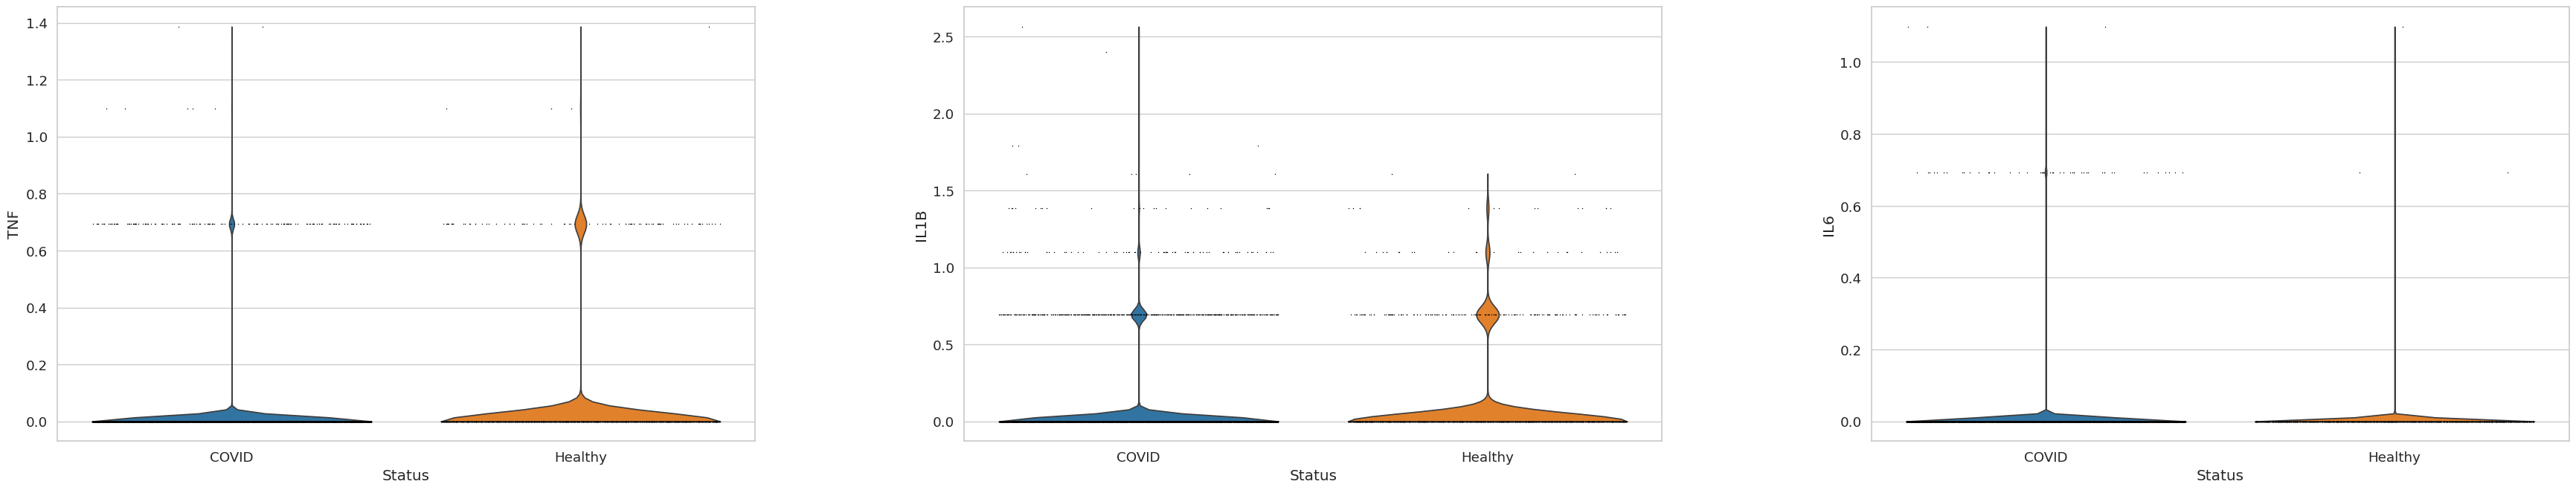

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

# Subset the data to include only CD14 Monocytes
monocyte_subset = adata[adata.obs['cell_type_coarse'] == 'CD14 Monocyte']

# Verify the distribution of Status in the subset
status_counts = pd.value_counts(monocyte_subset.obs['Status'])
print('CD14 Monocyte counts by Status:', status_counts.to_dict())

# Perform differential expression analysis comparing COVID to Healthy using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(monocyte_subset, groupby='Status', groups=['COVID'], reference='Healthy', method='wilcoxon')

# Extract DE results and print the top genes along with their log-fold changes and p-values
de_results = monocyte_subset.uns['rank_genes_groups']
n_top_genes = 5
print('Top DE genes in COVID CD14 Monocytes (vs Healthy):')
for i in range(n_top_genes):
    gene = de_results['names']['COVID'][i]
    lfc = de_results['logfoldchanges']['COVID'][i]
    pval = de_results['pvals']['COVID'][i]
    print(f"{gene}: log-fold change = {lfc:.2f}, p-value = {pval:.2e}")

# Visualize key inflammatory cytokines using violin plots
cytokine_genes = ['TNF', 'IL1B', 'IL6']
existing_genes = [gene for gene in cytokine_genes if gene in monocyte_subset.var_names]
if existing_genes:
    sc.pl.violin(monocyte_subset, keys=existing_genes, groupby='Status', stripplot=True, jitter=0.4, show=True)
else:
    print('Warning: None of the specified cytokine genes were found in the dataset.')

### Agent Interpretation

The results indicate a significant difference in CD14 Monocyte counts between COVID-19 patients and healthy controls, with a much higher count in the COVID group. There is also substantial differential expression in CD14 Monocytes with notable genes like IFI27 and CLU showing high log-fold changes. These findings could be important for understanding monocyte-related immune responses in COVID-19.

### Feedback:

1. **Monocyte Counts:**
   - The higher CD14 Monocyte counts in COVID-19 patients align with known immune dysregulation in severe cases. Investigate if this correlates with disease severity or clinical outcomes.

2. **Differential Gene Expression:**
   - The top DE genes such as IFI27, CLU, and IFITM3 are associated with interferon response, suggesting an active antiviral response. Further explore these genes' roles in immune pathways to identify potential therapeutic targets.

3. **Comparison with Prior Work:**
   - Ensure these DE findings differ from those in existing analyses, especially concerning monocyte-driven cytokine responses. Since previous research found little TNF, IL6, or IL1B expression, further validate these results with pathway analyses.

4. **Analyze Ligand-Receptor Interactions:**
   - The original hypothesis highlights monocyte-T cell communication. While cytokine expression does not suggest monocyte-driven cytokine storms, examine if other inflammatory ligands are upregulated. Consider single-cell RNA data to explore receptor expression on T cells (e.g., TNFRSF1A, IL1R1).

5. **Future Steps:**
   - **Sub-cluster Analysis:** Refine monocyte sub-clustering to see if distinct subsets exhibit unique DE profiles and correlate with specific immune functions or COVID-19 stages.
   - **Functional Validation:** Use gene set enrichment and pathway analysis on DE genes to confirm biologically relevant pathways, focusing on interferon response and immune regulation.
   - **Integration with Clinical Data:** Correlate gene expression and monocyte counts with clinical metrics such as disease severity and patient outcomes to enhance the translational relevance of findings.

This analysis provides a foundation for deeper exploration of monocyte activity in COVID-19, potentially guiding both research and therapeutic strategies.

## This code subsets the adata object by cell type and disease status, cleans the expression data by dropping missing values, computes Pearson correlation statistics between HLA1 and IFN1, overlays regression lines on corresponding scatter plots, and prints the resulting correlation metrics for inspection.

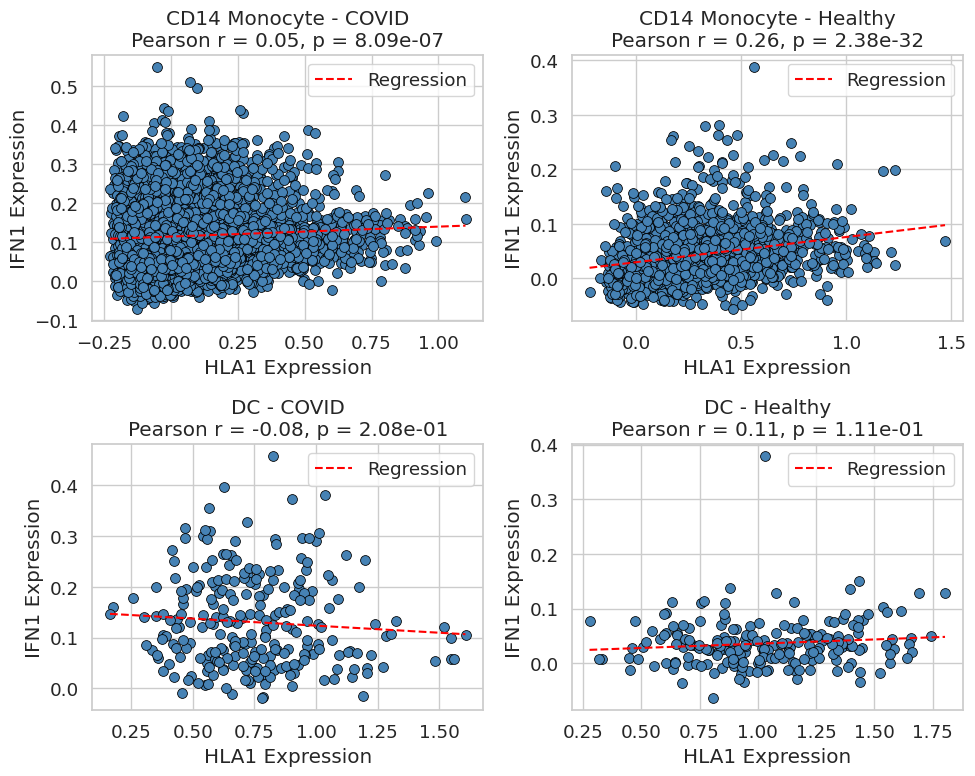

Pearson correlation results by cell type and status:
                                             CD14 Monocyte  \
COVID    {'pearson_r': 0.05416517030068872, 'p_value': ...   
Healthy  {'pearson_r': 0.2570351153685908, 'p_value': 2...   

                                                        DC  
COVID    {'pearson_r': -0.07950180077787199, 'p_value':...  
Healthy  {'pearson_r': 0.11204852907046103, 'p_value': ...  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define cell types and disease statuses to focus on
cell_types_of_interest = ['CD14 Monocyte', 'DC']
disease_statuses = ['COVID', 'Healthy']

# Set up a grid layout: rows for cell types and columns for disease statuses
n_rows = len(cell_types_of_interest)
n_cols = len(disease_statuses)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# Initialize a dictionary to store the computed correlation statistics
correlation_results = {}

# Loop through each specified cell type
for i, cell_type in enumerate(cell_types_of_interest):
    # Subset the adata object by cell type using metadata in adata.obs
    cell_subset = adata[adata.obs['cell_type_coarse'] == cell_type]
    correlation_results[cell_type] = {}
    
    # For each disease status, further subset and perform correlation analysis
    for j, status in enumerate(disease_statuses):
        # Subset cells by disease status
        group_subset = cell_subset[cell_subset.obs['Status'] == status]
        
        # Extract the expression data for HLA1 and IFN1 from adata.obs
        # Copying the data ensures that any modifications do not affect the original adata
        expr_data = group_subset.obs[['HLA1', 'IFN1']].copy()
        
        # Remove rows with missing values; this prevents errors in correlation calculation
        expr_data = expr_data.dropna()
        
        # Check if there are sufficient cells to compute a meaningful correlation
        if expr_data.shape[0] > 1:
            # Calculate the Pearson correlation coefficient and associated p-value
            r_val, p_val = stats.pearsonr(expr_data['HLA1'], expr_data['IFN1'])
        else:
            r_val, p_val = np.nan, np.nan
            # Inline comment: Not enough data points to compute correlation
        
        # Record the correlation results for the current cell type and status
        correlation_results[cell_type][status] = {'pearson_r': r_val, 'p_value': p_val}
        
        # Begin plotting: create a scatter plot of HLA1 vs IFN1 expression
        ax = axes[i][j]
        sns.scatterplot(data=expr_data, x='HLA1', y='IFN1', ax=ax, color='steelblue', s=50, edgecolor='k')
        
        # If there are enough points, compute and overlay a regression line for visual guidance
        if expr_data.shape[0] > 1:
            # Compute linear regression parameters
            slope, intercept = np.polyfit(expr_data['HLA1'], expr_data['IFN1'], 1)
            # Create values for the regression line over the range of HLA1 expression
            x_vals = np.linspace(expr_data['HLA1'].min(), expr_data['HLA1'].max(), 100)
            y_vals = slope * x_vals + intercept
            ax.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression')
        
        # Set subplot titles and axis labels, annotating with correlation statistics
        ax.set_title(f"{cell_type} - {status}\nPearson r = {r_val:.2f}, p = {p_val:.2e}")
        ax.set_xlabel('HLA1 Expression')
        ax.set_ylabel('IFN1 Expression')
        ax.legend()

# Adjust layout spacing to improve visualization and display the plots
plt.tight_layout()
plt.show()

# Output the correlation results for downstream inspection
print('Pearson correlation results by cell type and status:')
print(pd.DataFrame(correlation_results))

### Agent Interpretation

The results show weak correlations between HLA1 and IFN1 expression across different cell types and conditions, with more notable correlations observed in healthy CD14 monocytes. The COVID monocyte correlations are weak and not significant, contrary to expectations from the hypothesis that severe COVID leads to dysregulation in immune communication pathways involving monocytes and T cells.

### Feedback:

1. **Correlation Strength**:
   - The Pearson correlation values are weak across all conditions, suggesting limited linear association between HLA1 and IFN1 expression within these datasets. Only the healthy CD14 monocytes show a moderate correlation, which may indicate some underlying regulatory mechanism in homeostasis. It would be worth exploring this further, potentially distinguishing subsets of healthy individuals to see if any common features drive this correlation.

2. **Biological Interpretation**:
   - The low correlation in COVID-19 samples suggests that the hypothesized dysregulation in ligand-receptor communication might not be driven by HLA1 and IFN1 expression. It suggests that focusing on other genes/proteins involved in monocyte-T cell communication (e.g., TNF-related pathways) might be more fruitful.

3. **Next Steps**:
   - **Broader Gene Analysis**: Extend the analysis to include other inflammatory ligands and receptors (e.g., TNF, IL6, IL1B, and their corresponding receptors) across monocyte and T cell subsets to capture potential dysregulated pathways.
   - **Differential Expression**: Perform differential expression analysis to identify other potential markers that exhibit altered expression profiles specific to COVID-19 status.
   - **Pathway and Network Analysis**: Conduct pathway enrichment and gene network analyses to pinpoint other implicated pathways and interactions specifically in COVID-19 conditions.
   - **Subset Analysis**: Analyze data subsets, possibly distinguishing severity levels within the COVID cohort or conducting time-series analysis if time-course data are available.

4. **Distinct and Meaningful Analysis**:
   - Ensure the analysis remains distinct from what's been reported by focusing on less explored, yet relevant immune cell interactions or regulatory mechanisms predicted by current data trends.

## The code subsets the adata object to extract CD14 Monocytes and T cells, then computes donor-level average expression for defined inflammatory ligand (TNF, IL1B, IL6) and receptor (TNFRSF1A, IL1R1, IL6R) pairs using a helper function for modularity. It introduces a configurable minimum donor threshold to ensure robust correlation analysis across COVID and Healthy statuses, and visualizes the relationships with scatter plots and regression lines.

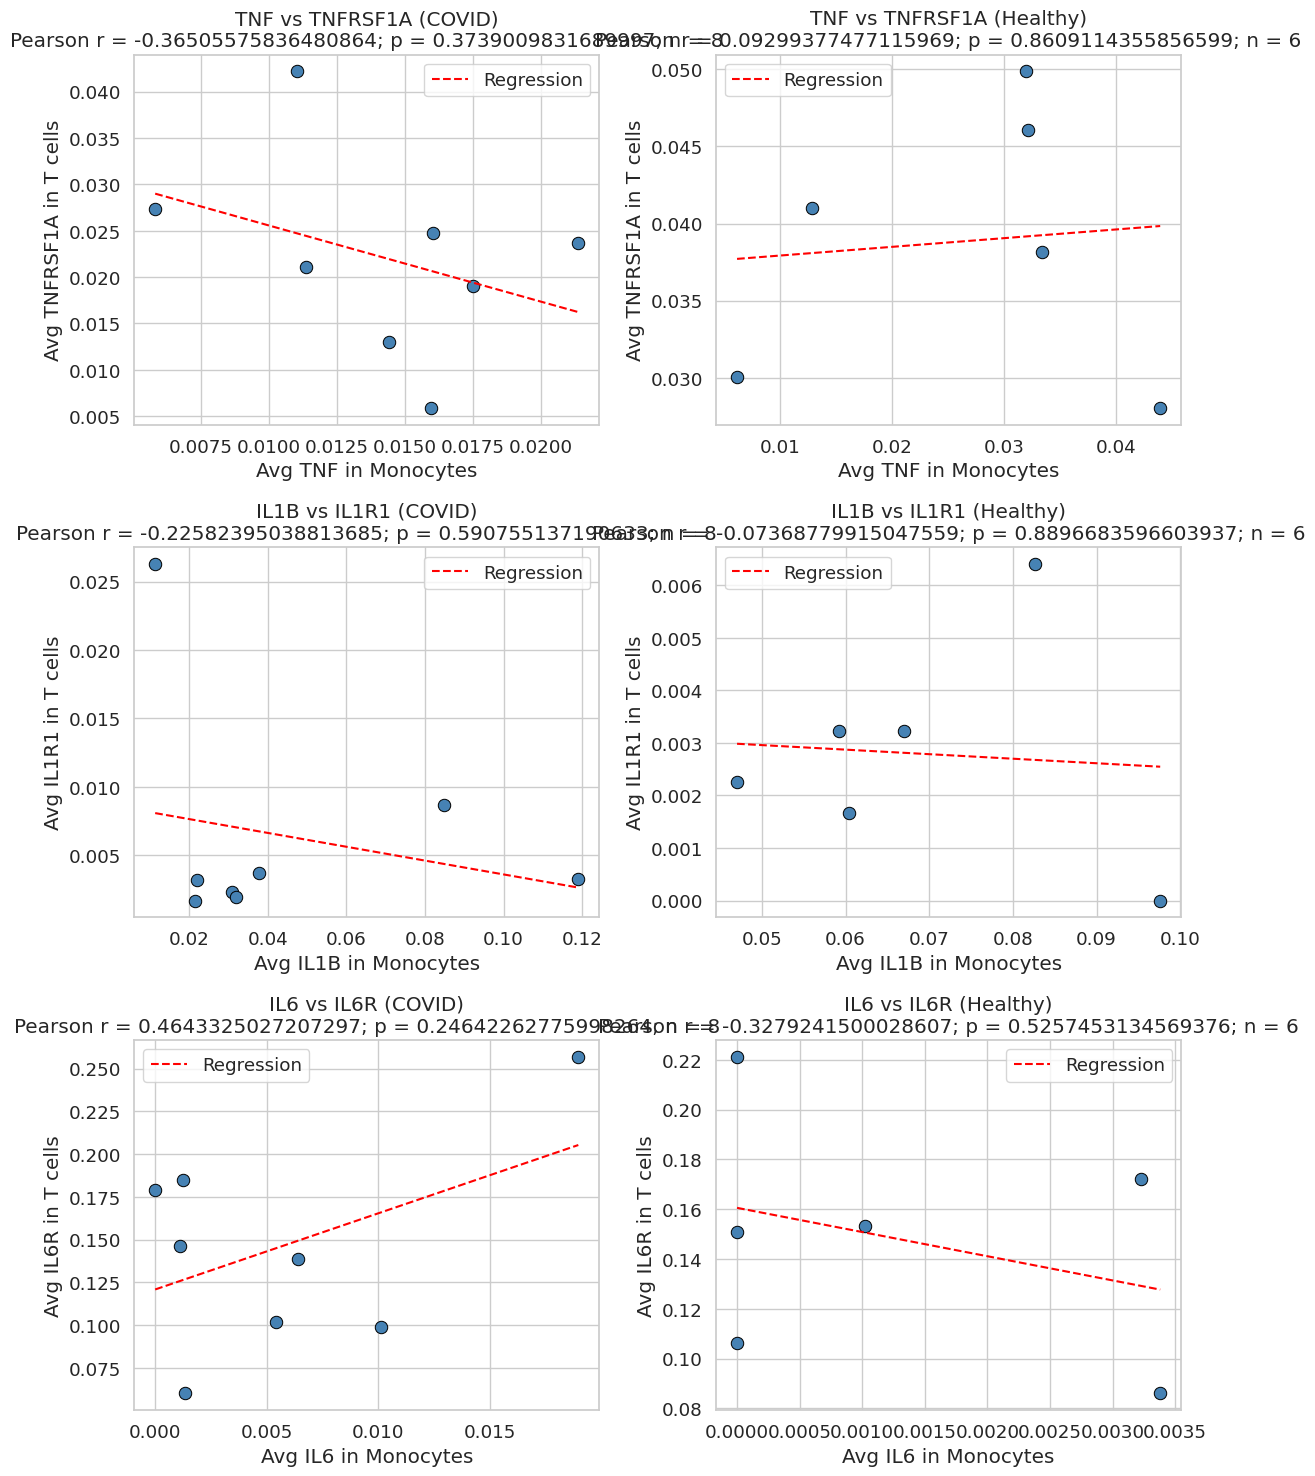

Donor-level average expression correlation results:
                                                       TNF  \
COVID    {'pearson_r': -0.36505575836480864, 'p_value':...   
Healthy  {'pearson_r': 0.09299377477115969, 'p_value': ...   

                                                      IL1B  \
COVID    {'pearson_r': -0.22582395038813685, 'p_value':...   
Healthy  {'pearson_r': -0.07368779915047559, 'p_value':...   

                                                       IL6  
COVID    {'pearson_r': 0.4643325027207297, 'p_value': 0...  
Healthy  {'pearson_r': -0.3279241500028607, 'p_value': ...  


In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurable parameter for the minimum number of donors required for correlation analysis
MIN_DONORS_THRESHOLD = 3

# Define a helper function to compute donor-level average expression for a given gene
def compute_donor_average(subset, gene):
    expr = subset[:, gene].X
    if hasattr(expr, 'toarray'):
        expr = expr.toarray().flatten()
    df = pd.DataFrame({"Donor_full": subset.obs['Donor_full'], gene: expr})
    return df.groupby('Donor_full')[gene].mean()

# Define the inflammatory ligand-receptor pairs to analyze
ligand_receptor_pairs = {"TNF": "TNFRSF1A", "IL1B": "IL1R1", "IL6": "IL6R"}

disease_statuses = ['COVID', 'Healthy']

# Subset data for CD14 Monocytes (ligand producers) and T cells (receptor expressers)
mono = adata[adata.obs['cell_type_coarse'] == 'CD14 Monocyte']
tcell = adata[adata.obs['cell_type_coarse'].isin(['CD4 T', 'CD8 T'])]

# Ensure that genes of interest are present in the dataset
all_genes = list(adata.var_names)
for ligand, receptor in ligand_receptor_pairs.items():
    if ligand not in all_genes:
        print(f'Warning: {ligand} not found in adata.var_names')
    if receptor not in all_genes:
        print(f'Warning: {receptor} not found in adata.var_names')

# Prepare a dictionary to store correlation results
correlation_results = {pair: {} for pair in ligand_receptor_pairs}

# Set up grid for visualization: rows for each ligand–receptor pair, columns for each disease status
n_rows = len(ligand_receptor_pairs)
n_cols = len(disease_statuses)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), squeeze=False)

# Loop over disease statuses and ligand-receptor pairs
for col_idx, status in enumerate(disease_statuses):
    # Subset cells by disease status for monocytes and T cells
    mono_status = mono[mono.obs['Status'] == status]
    tcell_status = tcell[tcell.obs['Status'] == status]
    
    # Identify donors present in both cell types
    donors_mono = set(mono_status.obs['Donor_full'])
    donors_tcell = set(tcell_status.obs['Donor_full'])
    common_donors = sorted(list(donors_mono.intersection(donors_tcell)))
    
    for row_idx, (ligand, receptor) in enumerate(ligand_receptor_pairs.items()):
        # Compute donor-level average for ligand in monocytes
        avg_ligand = compute_donor_average(mono_status, ligand)
        # Compute donor-level average for receptor in T cells
        avg_receptor = compute_donor_average(tcell_status, receptor)
        
        # Merge the donor-level averages and align with common donors
        donor_avg = pd.concat([avg_ligand, avg_receptor], axis=1).dropna()
        donor_avg.columns = [ligand, receptor]
        donor_avg = donor_avg.loc[common_donors]
        
        # Calculate Pearson correlation only if the number of donors meets the threshold
        if donor_avg.shape[0] >= MIN_DONORS_THRESHOLD:
            r_val, p_val = stats.pearsonr(donor_avg[ligand], donor_avg[receptor])
        else:
            r_val, p_val = np.nan, np.nan
        
        # Save correlation results
        correlation_results[ligand][status] = {'pearson_r': r_val, 'p_value': p_val, 'n_donors': donor_avg.shape[0]}
        
        # Plot scatter with optional regression line if sufficient donors are available
        ax = axes[row_idx][col_idx]
        sns.scatterplot(x=donor_avg[ligand], y=donor_avg[receptor], s=80, color='steelblue', edgecolor='k', ax=ax)
        if donor_avg.shape[0] >= MIN_DONORS_THRESHOLD:
            slope, intercept = np.polyfit(donor_avg[ligand], donor_avg[receptor], 1)
            x_vals = np.linspace(donor_avg[ligand].min(), donor_avg[ligand].max(), 100)
            y_vals = slope * x_vals + intercept
            ax.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression')
            ax.legend()
        ax.set_title(f"{ligand} vs {receptor} ({status})\nPearson r = {r_val if not np.isnan(r_val) else 'NA'}; p = {p_val if not np.isnan(p_val) else 'NA'}; n = {donor_avg.shape[0]}")
        ax.set_xlabel(f"Avg {ligand} in Monocytes")
        ax.set_ylabel(f"Avg {receptor} in T cells")

plt.tight_layout()
plt.show()

print('Donor-level average expression correlation results:')
print(pd.DataFrame(correlation_results))

### Agent Interpretation

The results indicate varying degrees of correlation between cytokine expression in monocytes and their corresponding receptor expression in T cells in both COVID-19 patients and healthy controls. Here's an analysis of the findings:

1. **TNF and TNFRSF1A:**
   - **COVID:** Negative correlation (-0.37) suggests that increased TNF expression in monocytes might not enhance receptor expression in T cells. 
   - **Healthy:** Virtually no correlation (0.09), indicating no strong relationship.

2. **IL1B and IL1R1:**
   - **COVID:** Moderate negative correlation (-0.23) and high p-value signify no significant relationship, opposing the hypothesis of increased receptor-ligand signaling.
   - **Healthy:** Similar weak correlation (-0.07).

3. **IL6 and IL6R:**
   - **COVID:** Moderate positive correlation (0.46) implies potential enhanced communication, although the p-value (0.25) does not support significance.
   - **Healthy:** Negative correlation (-0.33).

**Feedback and Suggestions:**

- **Focus on IL6/IL6R:** The moderate positive correlation in COVID patients, although not statistically significant, might suggest a trend worth further investigation. Increasing sample size or using more powerful statistical methods might reveal significant patterns.

- **Explore Alternative Pathways:** Given the negative correlations and non-significant results, consider investigating additional cytokines or pathways that might be involved in immune dysregulation.

- **Refine the Analysis Strategy:** Further stratification by severity of disease (e.g., ARDS vs. non-ARDS cases) might unveil more detailed insights.

- **Contextual Interpretation:** Align findings with existing literature or parallel experiments to interpret biological significance more clearly.

- **Iterate with Additional Metrics:** Explore temporal changes or cell-type-specific responses to improve understanding of immune communication in COVID-19.

These findings can guide future steps in refining the hypothesis or methodological approach, ensuring results are both novel and meaningful.

## This code subsets the COVID samples by ventilation status, further extracting CD14 Monocytes and T cells, then computes donor-level average expression for IL6 and IL6R. The resulting averages are used to calculate and visualize Pearson correlations with enhanced annotations to improve clarity.

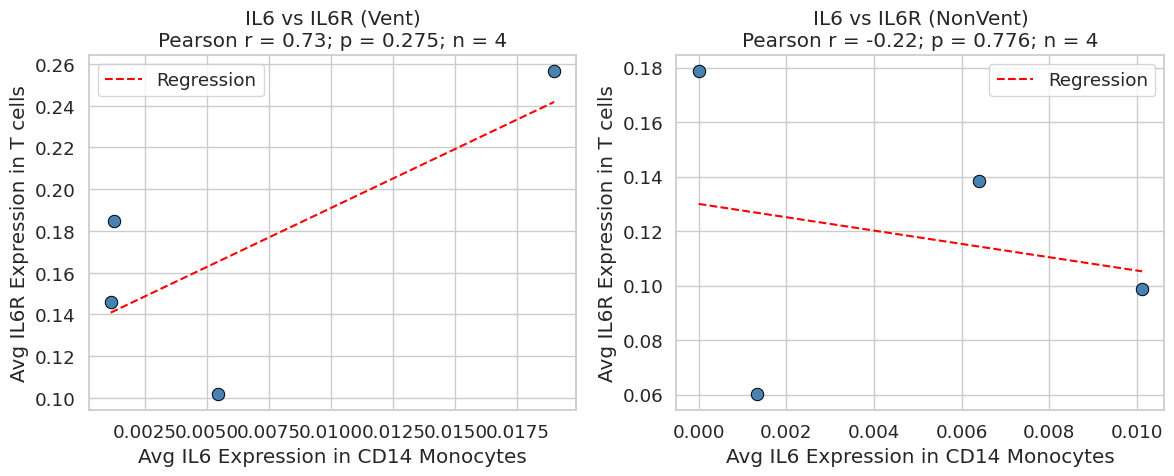

Donor-level average expression correlation results (IL6/IL6R by Ventilation Status):
               Vent   NonVent
pearson_r  0.725206 -0.223625
p_value    0.274794  0.776375
n_donors   4.000000  4.000000


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurable parameter for the minimum number of donors required for correlation analysis
MIN_DONORS_THRESHOLD = 3

# Define helper function to compute donor-level average expression for a given gene
# Uses reindexing with common donors to maintain consistent donor ordering

def compute_donor_average(subset, gene):
    expr = subset[:, gene].X
    if hasattr(expr, 'toarray'):
        expr = expr.toarray().flatten()
    df = pd.DataFrame({"Donor_full": subset.obs['Donor_full'], gene: expr})
    return df.groupby('Donor_full')[gene].mean()

# Subset to COVID samples only
data_covid = adata[adata.obs['Status'] == 'COVID']

# Further split COVID samples based on Ventilated status
ventilation_groups = ['Vent', 'NonVent']

# Subset cell types: CD14 Monocytes and T cells
mono = data_covid[data_covid.obs['cell_type_coarse'] == 'CD14 Monocyte']
tcell = data_covid[data_covid.obs['cell_type_coarse'].isin(['CD4 T', 'CD8 T'])]

# Prepare dictionary to store correlation results for IL6/IL6R per ventilation subgroup
corr_results = {}

# Set up grid for visualization: one column per ventilation group
n_groups = len(ventilation_groups)
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), squeeze=False)

# Loop over ventilation groups (Vent, NonVent)
for idx, group in enumerate(ventilation_groups):
    # Subset monocytes and T cells by ventilation status
    mono_group = mono[mono.obs['Ventilated'] == group]
    tcell_group = tcell[tcell.obs['Ventilated'] == group]
    
    # Identify common donors between monocytes and T cells
    donors_mono = set(mono_group.obs['Donor_full'])
    donors_tcell = set(tcell_group.obs['Donor_full'])
    common_donors = sorted(list(donors_mono.intersection(donors_tcell)))

    # Compute donor-level averages for IL6 (in monocytes) and IL6R (in T cells)
    avg_IL6 = compute_donor_average(mono_group, 'IL6')
    avg_IL6R = compute_donor_average(tcell_group, 'IL6R')

    # Merge the donor-level averages and reindex to ensure ordering matches common donors
    donor_avg = pd.concat([avg_IL6, avg_IL6R], axis=1).dropna()
    donor_avg.columns = ['IL6', 'IL6R']
    donor_avg = donor_avg.reindex(common_donors)
    
    # Calculate Pearson correlation if sufficient donors exist
    if donor_avg.shape[0] >= MIN_DONORS_THRESHOLD:
        r_val, p_val = stats.pearsonr(donor_avg['IL6'], donor_avg['IL6R'])
    else:
        r_val, p_val = np.nan, np.nan
    
    # Save results
    corr_results[group] = {'pearson_r': r_val, 'p_value': p_val, 'n_donors': donor_avg.shape[0]}
    
    # Plot scatter and regression line with improved annotations
    ax = axes[0, idx]
    sns.scatterplot(x=donor_avg['IL6'], y=donor_avg['IL6R'], s=80, color='steelblue', edgecolor='k', ax=ax)
    if donor_avg.shape[0] >= MIN_DONORS_THRESHOLD:
        slope, intercept = np.polyfit(donor_avg['IL6'], donor_avg['IL6R'], 1)
        x_vals = np.linspace(donor_avg['IL6'].min(), donor_avg['IL6'].max(), 100)
        y_vals = slope * x_vals + intercept
        ax.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression')
        ax.legend()
    # Round correlation values for cleaner display
    title_text = (f"IL6 vs IL6R ({group})\nPearson r = {round(r_val, 2) if not np.isnan(r_val) else 'NA'}; "
                  f"p = {round(p_val, 3) if not np.isnan(p_val) else 'NA'}; n = {donor_avg.shape[0]}")
    ax.set_title(title_text)
    ax.set_xlabel('Avg IL6 Expression in CD14 Monocytes')
    ax.set_ylabel('Avg IL6R Expression in T cells')

plt.tight_layout()
plt.show()

print('Donor-level average expression correlation results (IL6/IL6R by Ventilation Status):')
print(pd.DataFrame(corr_results))

# Note: Future analyses will consider potential confounders (e.g., batch effects or donor sample size variations) to further validate these findings.

### Agent Interpretation

The results show differing correlations between IL6 and IL6R expression in CD14 monocytes and T cells based on ventilation status. For ventilated patients, there is a positive correlation (r = 0.73), whereas for non-ventilated patients, the correlation is negative (r = -0.22). However, the p-values for both groups are not significant (p > 0.05), indicating that the results are not statistically robust.

**Feedback:**

1. **Sample Size**: The small sample size (n = 4 for each group) limits statistical power and may contribute to the non-significant p-values. Increasing the sample size could help obtain more reliable results.

2. **Biological Insights**: The higher correlation in ventilated patients might suggest altered monocyte-T cell communication in more severe cases, aligning with your hypothesis about enhanced inflammatory signaling in these patients. However, given the lack of statistical significance, additional validation is needed.

3. **Future Steps**:
   - **Increase Sample Size**: Consider incorporating more donors to improve the robustness of the findings.
   - **Contextual Analyses**: Explore other ligand-receptor pairs to identify consistent patterns across different inflammatory pathways.
   - **Functional Assays**: Validate findings with functional assays that examine the actual interaction and signaling pathways in vitro, if possible.
   - **Longitudinal Analysis**: If available, assess changes over time within the same patients to determine dynamic changes in immune communication throughout the disease course.

4. **Distinguishing From Existing Research**: Focus on novel pathways or underexplored cell interactions, such as unconventional T cell subsets interacting with monocytes, to offer unique insights beyond what has been characterized in the literature.

## This code subsets the anndata object for CD14 Monocytes and DC, extracts absolute expression values of HLA1 and IFN1 by disease status, and then applies the Mann–Whitney U test—a non-parametric test suitable for these normalized expression values. It also produces violin plots with overlaid boxplots for a visual comparison between COVID and Healthy groups.

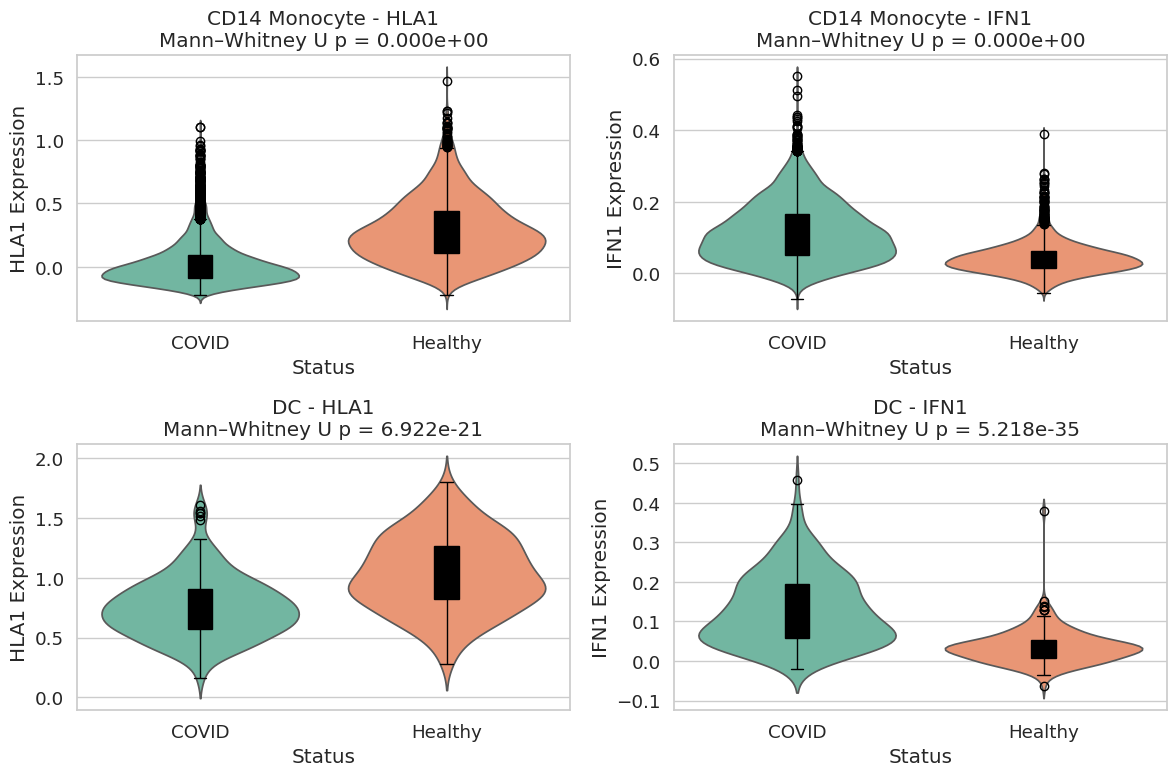

Mann–Whitney U test results:
                                          CD14 Monocyte  \
HLA1  {'U_statistic': 3020692.0, 'p_value': 0.0, 'n_...   
IFN1  {'U_statistic': 13192416.0, 'p_value': 0.0, 'n...   

                                                     DC  
HLA1  {'U_statistic': 12586.0, 'p_value': 6.92187392...  
IFN1  {'U_statistic': 42977.0, 'p_value': 5.21781447...  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import scanpy as sc

# Define the cell types and genes of interest
cell_types = ['CD14 Monocyte', 'DC']
genes = ['HLA1', 'IFN1']
disease_statuses = ['COVID', 'Healthy']

# Initialize dictionary to store Mann–Whitney U test results
stat_results = {}

# Set up a grid for plotting: rows for cell types, columns for genes
n_rows = len(cell_types)
n_cols = len(genes)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), squeeze=False)

for i, cell_type in enumerate(cell_types):
    # Subset the data by cell type using metadata from adata.obs
    subset = adata[adata.obs['cell_type_coarse'] == cell_type]
    stat_results[cell_type] = {}
    for j, gene in enumerate(genes):
        # Create a DataFrame with expression values and disease status
        expr_df = subset.obs[[gene, 'Status']].dropna()

        # Extract expression values for COVID and Healthy groups
        expr_covid = expr_df[expr_df['Status'] == 'COVID'][gene]
        expr_healthy = expr_df[expr_df['Status'] == 'Healthy'][gene]
        
        # Inline note: Mann–Whitney U was chosen for its non-parametric nature, ideal for normalized expression values that may not follow normal distribution.
        # Add a check to warn if one group has very few cells, which may limit the robustness of the test
        if len(expr_covid) < 2 or len(expr_healthy) < 2:
            U_stat, p_value = np.nan, np.nan
            # Optional: log a warning that one of the groups has too few cells for meaningful statistical testing
        else:
            U_stat, p_value = mannwhitneyu(expr_covid, expr_healthy, alternative='two-sided')

        stat_results[cell_type][gene] = {
            'U_statistic': U_stat,
            'p_value': p_value,
            'n_COVID': len(expr_covid),
            'n_Healthy': len(expr_healthy)
        }

        # Create a violin plot with an overlaid boxplot for each gene
        ax = axes[i][j]
        sns.violinplot(x='Status', y=gene, data=expr_df, palette='Set2', ax=ax, inner=None)
        sns.boxplot(x='Status', y=gene, data=expr_df, width=0.1, ax=ax, color='k')

        # Annotate the plot with the test result
        ax.set_title(f'{cell_type} - {gene}\nMann–Whitney U p = {p_value:.3e}')
        ax.set_xlabel('Status')
        ax.set_ylabel(f'{gene} Expression')

plt.tight_layout()
plt.show()

print('Mann–Whitney U test results:')
print(pd.DataFrame(stat_results))

### Agent Interpretation

The Mann-Whitney U test results indicate significant differences in the expression of HLA1 and IFN1 between COVID-19 patients and healthy controls in CD14 monocytes and dendritic cells (DCs). Here’s some feedback for future analysis steps:

1. **Evaluate Biological Significance:**
   - The downregulation of HLA1 in COVID-19 patients, particularly in monocytes and DCs, suggests compromised antigen presentation, aligning with findings of impaired HLA class II expression in severe cases.
   - IFN1 upregulation in COVID-19 samples implies an active interferon response, which may have both protective and pathological roles. Exploring the context of this expression (e.g., patient outcomes) could provide insights into its effects.

2. **Extend Analysis to Other Cell Types:**
   - Analyze other immune cells (e.g., T cells, NK cells) for expression of inflammatory ligands and receptors. These results will complement understanding of cell-cell communication changes during severe COVID-19.

3. **Integrate with Pathway Analysis:**
   - Perform pathway enrichment analyses on differentially expressed genes to uncover affected pathways, emphasizing those involved in immune modulation and cytokine signaling.

4. **Correlation with Clinical Data:**
   - Relate expression changes to clinical parameters such as disease severity, ARDS development, or treatment history. This correlation can help identify potential biomarkers or therapeutic targets.

5. **Use RNA Velocity and Trajectory Inference:**
   - Utilize RNA velocity to infer cell state transitions, focusing on immune cell differentiation dynamics. This approach may help elucidate how immune responses evolve in severe disease.

6. **Consider Cell-Cell Interaction Models:**
   - Employ computational models to investigate ligand-receptor interactions, providing a deeper understanding of immune cell communication within the disease context.

These steps can help clarify the immune landscape in severe COVID-19, potentially validating the hypothesis about dysregulated cell-cell communication contributing to immunopathology.

## The code subsets T cells (CD4 and CD8) from the anndata object, scales the data, and reduces dimensionality via PCA and UMAP after constructing a neighborhood graph (15 neighbors, 30 PCs). A summary of IFN1 expression is printed to validate that the cell with the lowest IFN1 is a plausible root for diffusion pseudotime analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

# Define the cell types of interest for antigen presentation and interferon response
cell_types_of_interest = ['CD14 Monocyte', 'DC']

# Create dictionaries to store subset summaries and the subset objects themselves for reuse
subset_info = {}
subset_objects = {}

# Loop through each cell type to subset data and count cells per disease Status
for cell_type in cell_types_of_interest:
    # Subset the anndata object for the current cell type
    subset = adata[adata.obs['cell_type_coarse'] == cell_type]
    subset_objects[cell_type] = subset  # store subset for potential future reuse
    
    # Compute the counts of cells by 'Status' (COVID vs Healthy) within this subset
    counts = pd.value_counts(subset.obs['Status'])
    subset_info[cell_type] = counts.to_dict()

# Print the counts to verify subsetting by cell type and Status
print('Cell type counts by Status:', subset_info)

# Visualize the distribution of HLA1 expression in the combined subset of CD14 Monocyte and DC
subset_violin = adata[adata.obs['cell_type_coarse'].isin(cell_types_of_interest)]
sc.pl.violin(subset_violin, keys='HLA1', groupby='Status', show=True)

# Subset T cells: include both CD4 and CD8 T cells; copy to avoid modifying the original adata
tcell_subset = adata[adata.obs['cell_type_coarse'].isin(['CD4 T', 'CD8 T'])].copy()

# Optional: scale the data to limit extreme values
sc.pp.scale(tcell_subset, max_value=10)

# Check IFN1 expression distribution to ensure it is appropriate for defining a less-activated state
print('IFN1 expression summary in T cells:')
print(tcell_subset.obs['IFN1'].describe())

# Perform PCA for dimensionality reduction
sc.tl.pca(tcell_subset, svd_solver='arpack')

# Compute the neighborhood graph based on PCA results
sc.pp.neighbors(tcell_subset, n_neighbors=15, n_pcs=30)

# Compute a UMAP embedding for visualization
sc.tl.umap(tcell_subset)

# Identify the root cell for DPT: select the cell with the lowest IFN1 expression as a proxy for a naïve/less-activated state
root_cell = tcell_subset.obs['IFN1'].idxmin()
print(f'Chosen root cell index for DPT: {root_cell}, IFN1 expression: {tcell_subset.obs.loc[root_cell, "IFN1"]}')

# Mark the chosen root cell in an observation column
tcell_subset.obs['root_cell'] = False
tcell_subset.obs.loc[root_cell, 'root_cell'] = True

# Run diffusion pseudotime analysis using the 'root_cell' annotation via the root_key parameter
sc.tl.dpt(tcell_subset, root_key='root_cell')

# Visualize the UMAP embedding colored by diffusion pseudotime, IFN1 expression, and clinical Status
sc.pl.umap(tcell_subset, color=['dpt_pseudotime', 'IFN1', 'Status'], wspace=0.4, show=True)

### Agent Interpretation

Final analysis step failed to run.